# 1. plot free energy surface based on CV

In [ ]:
# use in server to generate fes.dat
cd ~/Project/Fe-C-N4_sol/lmp/frozen_model/log_out
conda activate deepmd-official
plumed sum_hills --hills HILLS --outfile fes.dat --mintozero
plumed  sum_hills --hills HILLS --stride 1000 --mintozero 
#--stride 1000 : 每 1000 次 Gaussian 偏执势沉积 计算一次自由能面
# 每次经历的时间 = 100（即METAD中PACE）* 0.5 fs（即MD的time steps） = 0.05 ps, 即 0.05 ps * 1000 = 50 ps 计算一次自由能面 

## plot 1 CV - free energy surface

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('E:\\Project\\Fe-C-N4\\trajectory\\activate-learning\\iter10\\model-0-with-CV10_MetaD-2000ps(height-0.05_d_O12_Fe_wall-O2H-0.2_wall-O1H-0.2_wall-d-FeO1_wall-d-FeO2_wall-O1-O2)-模拟O2吸附于位点-增加采样时间--※用于label\\fes_4.dat')
x = data[:,0]   # 0 is CV-CN_O-H, 1 is CV-d_Fe-O
y = data[:,1]   # free energy
# plt.plot(x,y)
# plt.scatter(x,y, s=5, c='b', marker='o', alpha=0.5)
plt.plot(x,y)
plt.xlabel('CV CN$_{O^2-H}$ (Å)',fontsize=20)
plt.ylabel('Freee Energy (eV)',fontsize=20)
# plt.xlim(0.0,8.5)
# plt.ylim(0,0.14)
# plt.title('free energy surface based on CV')
plt.show()

## plot 2 CV - free energy surface

In [13]:
# plot 2D free energy surface with 2 CVs
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'        # Times New Roman   # print(plt.rcParams["font.family"][0])
# data = np.loadtxt('E:\\Project\\Fe-C-N4\\trajectory\\Fe-C-N4-sol-OH-new\\free-energy-surface\\fes-11-23.9.10.data-good-for-use', comments='#')
data = np.loadtxt('../activate-learning/iter11/DPGen-6-model-0-with-CV10_MetaD-1000ps(height-0.05_O1_H-O1-Fe_wall-O1H-2.2_wall-d-FeO1_wall-cell.z)--反应角度-后半段/fes_10.dat', comments='#')
x = data[:,0]
y = data[:,1]
z = data[:,2]
# transform data to 2D array
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
# plot the 2D free energy surface
plt.figure(figsize=(15,10))     # 15, 10
contourf_filled = plt.contourf(xi, yi, zi, 50, cmap='Blues_r')       # Blues_r Greens_r RdYlBu_r viridis  xx_r表示颜色反转
contours = plt.contour(xi, yi, zi, 10, colors='black', linewidths=1, alpha=0.5)       # 添加等高线轮廓  gray灰色
plt.clabel(contours, contours.levels[::1], inline=True, fontsize=18)       # 添加等高线标签

# plt.xlim(1.7,2.2)
plt.ylim(0,1.0)
plt.xlabel('CN O$^2$-H',fontsize=24,fontweight='bold')
plt.ylabel('CN O$^1$-O$^2$',fontsize=24,fontweight='bold')
# plt.ylabel('CN Fe-O$^1$',fontsize=24,fontweight='bold')
# plt.xlabel('S',fontsize=24,fontweight='bold')
# plt.ylabel('Z',fontsize=24,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = plt.colorbar(contourf_filled)
cbar.set_label('Free energy (eV)', rotation=90, labelpad=18, fontsize=20)   # 标签旋转角度 标签与colorbar的距离
cbar.ax.tick_params(labelsize=18)                                           # 设置colorbar刻度字体大小
# plt.title('Free energy surface based on CV 1 and 2',fontsize=20, fontweight='bold')
# plt.legend(loc=0,fontsize=22)     # 图例位置, 字号
plt.setp(plt.gca().spines.values(),linewidth=3)   # 边框线宽设为3
plt.tick_params(direction='in', width=2)    # 刻度线向内

plt.gca().spines[:].set_visible(True)      # False 隐藏边框线

""" # 添加指定坐标的点                                                        # 当有6个ref:                              # 当exp_values没有**2                   # 当exp_values有**2
x_coords = [ 2.136,   2.458,   2.542,  2.864]  # 这里替换为你的x坐标         x= 2.87, 3.33, 2.986, 3.47, 4, 4.13          2.269   2.456   2.661  2.706       2.02, 2.445, 2.814, 2.86    
y_coords = [-4.157,  -4.900,  -4.900, -4.157]  # 这里替换为你的y坐标         y= -5.62,-6.28, -5.71, -6.41, -5.71, -5.45  -4.371  -4.792  -4.737 -4.697      -3.653, -4.763, -4.51, -4.417
sizes = [200, 200, 200, 200]  # 这里替换为你的点的大小    , 200, 200
colors = ['r', 'b', 'y', 'g']  # 这里替换为你的点的颜色 红 蓝 黄 绿 黑 青  , 'k', 'c'
labels = ['1','2','3','4']      # ,'5','6'
plt.scatter(x_coords, y_coords, s=sizes, c=colors)
for i, label in enumerate(labels):
    plt.text(x_coords[i], y_coords[i], label, fontsize=14) """

""" x_coords = [ 2.593,   3.169,   3.453,  3.772, 4.447, 5.128, 5.317]  # 这里替换为你的x坐标         x= 2.87, 3.33, 2.986, 3.47, 4, 4.13          2.269   2.456   2.661  2.706                            2.02, 2.445, 2.814, 2.86    
y_coords = [-4.586,  -5.915,  -6.151, -5.897,-6.105,-5.155,-4.771]  # 这里替换为你的y坐标         y= -5.62,-6.28, -5.71, -6.41, -5.71, -5.45  -4.371  -4.792  -4.737 -4.697                           -3.653, -4.763, -4.51, -4.417
sizes = [200,200,200,200,200,200,200]  # 这里替换为你的点的大小    , 200, 200
colors = ['r', 'b', 'y', 'g', 'k', 'c', 'm']  # 这里替换为你的点的颜色 红 蓝 黄 绿 黑 青  , 'k', 'c'
labels = ['1','2','3','4' ,'5','6' ,'7']      # ,'5','6'
plt.scatter(x_coords, y_coords, s=sizes, c=colors)
for i, label in enumerate(labels):
    plt.text(x_coords[i], y_coords[i], label, fontsize=14) """

plt.show()

""" # plot 1D free energy surface with 1 CV using integration
z_integrated_y = np.trapz(zi, yi, axis=0)     # integrate along the y axis(axis=0)
plt.plot(xi, z_integrated_y)
plt.xlabel('CV CN_O1-otherH (aingstrom)')
plt.ylabel('Free energy (eV)')
plt.title('Free energy based on CV 1',fontsize=14, fontweight='bold')
plt.show()

z_integrated_x = np.trapz(zi, xi, axis=1)     # integrate along the x axis(axis=1)
plt.plot(yi, z_integrated_x)
plt.xlabel('CV CN_F-O (aingstrom)')
plt.ylabel('Free energy (eV)')
plt.title('Free energy based on CV 2',fontsize=14, fontweight='bold')
plt.show() """

" # plot 1D free energy surface with 1 CV using integration\nz_integrated_y = np.trapz(zi, yi, axis=0)     # integrate along the y axis(axis=0)\nplt.plot(xi, z_integrated_y)\nplt.xlabel('CV CN_O1-otherH (aingstrom)')\nplt.ylabel('Free energy (eV)')\nplt.title('Free energy based on CV 1',fontsize=14, fontweight='bold')\nplt.show()\n\nz_integrated_x = np.trapz(zi, xi, axis=1)     # integrate along the x axis(axis=1)\nplt.plot(yi, z_integrated_x)\nplt.xlabel('CV CN_F-O (aingstrom)')\nplt.ylabel('Free energy (eV)')\nplt.title('Free energy based on CV 2',fontsize=14, fontweight='bold')\nplt.show() "

Text(0, 0.5, 'CV CN-Fe-all_O')

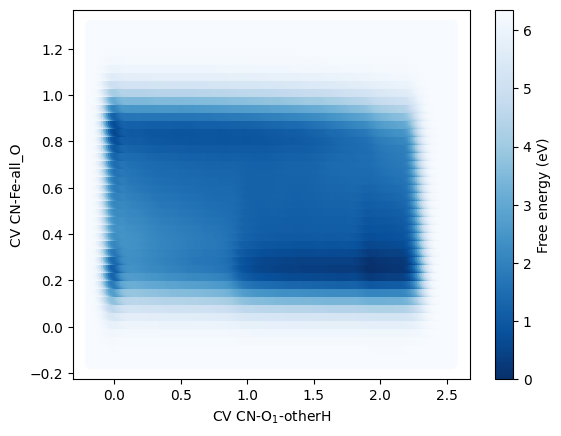

In [2]:
# 不做网格化处理，直接用点+颜色画图
import numpy as np
import matplotlib.pyplot as plt
# data = np.loadtxt('E:\\Project\\Fe-C-N4\\trajectory\\Fe-C-N4-sol-OH-new\\free-energy-surface\\fes-11-23.9.10.data-good-for-use', comments='#')
data = np.loadtxt('E:\\Project\\Fe-C-N4\\trajectory\\activate-learning\\iter11\model-0-with-CV10_MetaD-1000ps(height-0.05_O2_H-O1-O2_wall-O2H-2.2_wall-O1H-0.2_wall-d-FeO1_wall-O1-O2_wall-cell.z)-待分析\\fes_10.dat', comments='#')
x = data[:,0]
y = data[:,1]
z = data[:,2]
# plt.figure(figsize=(8, 8))
plt.scatter(x, y, c=z, marker='o', s=70, cmap='Blues_r')        #, vmin=0.0, vmax=2.5       RdYlBu_r
# plt.xlim(+1.6,+2.4)
# plt.ylim(-4.0,-2.5)
plt.colorbar(label='Free energy (eV)')
plt.xlabel('CV CN-O$_1$-otherH')
plt.ylabel('CV CN-Fe-all_O')

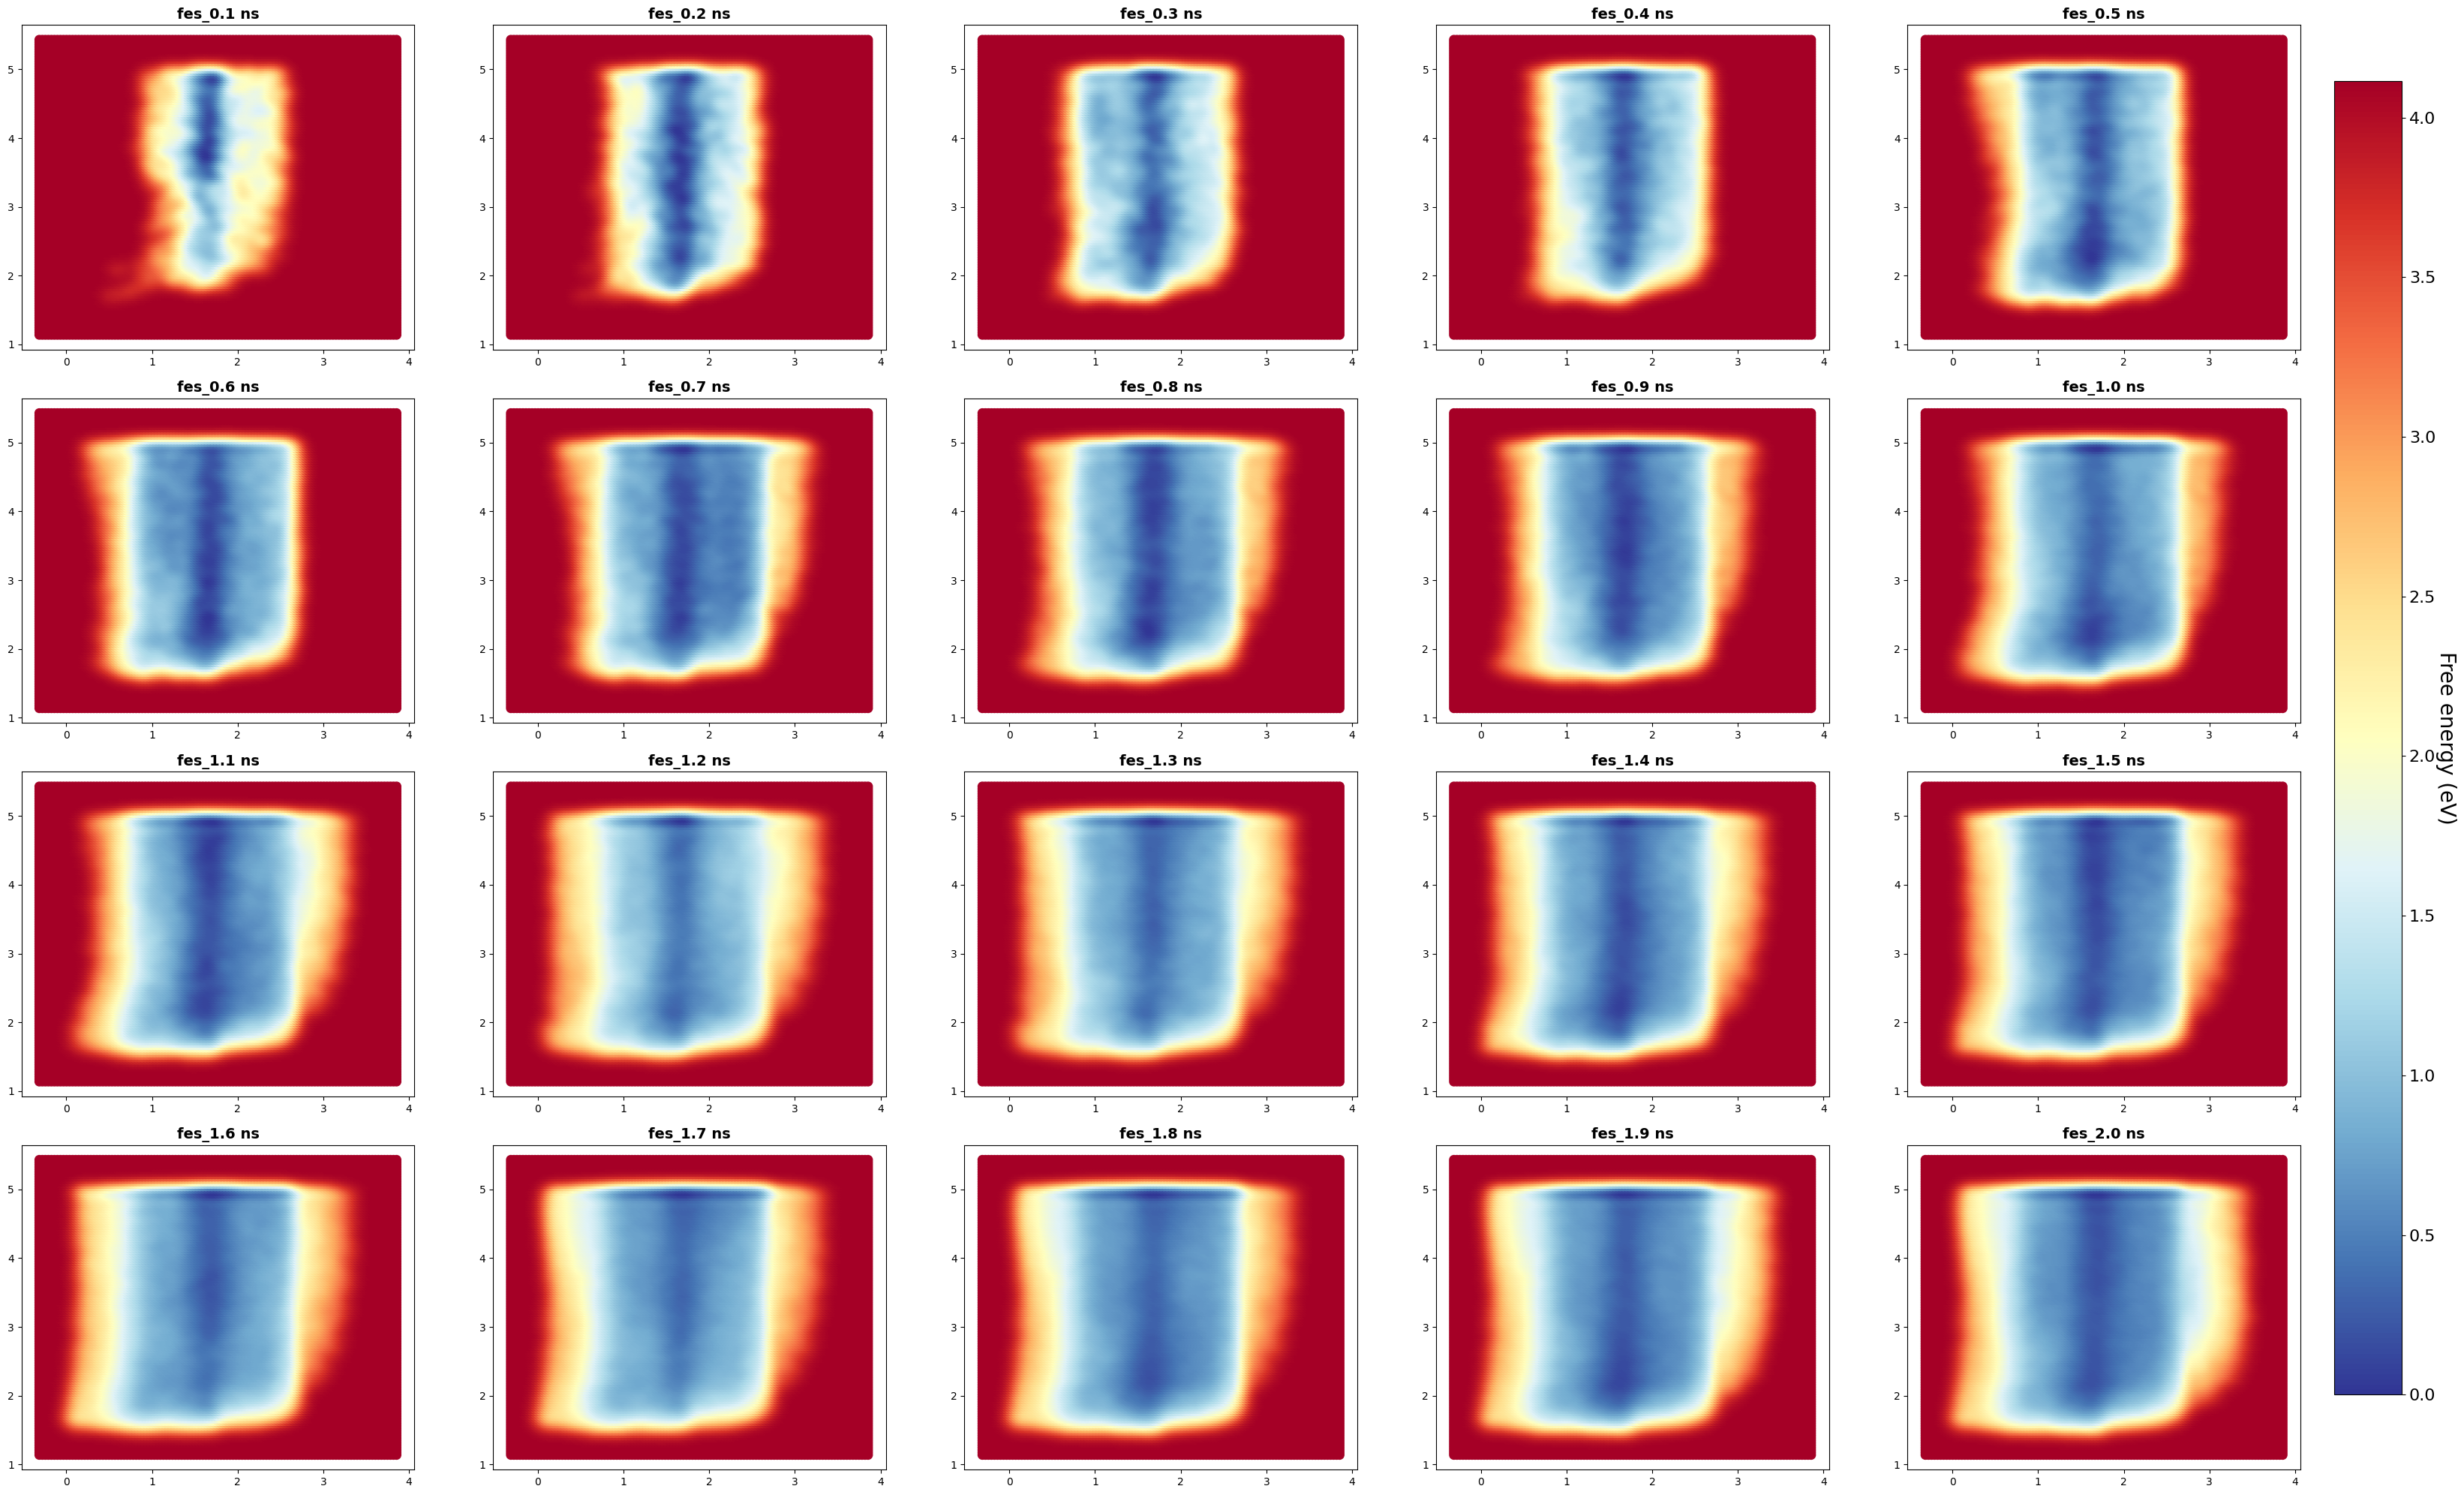

In [3]:
# Analysis fes with time
# cmd运行 ipcluster nbextension enable --user --py ipyparallel
# %%px --targets 0 --noblock        # 用于每个单元格并行化
import numpy as np
import matplotlib.pyplot as plt
def plt_fes_with_time(dir_prefix, fes_index, ax):
    data = np.loadtxt(dir_prefix + f'\\fes_{fes_index}.dat', comments='#')
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    im = ax.scatter(x, y, c=z, marker='o', s=70, cmap='RdYlBu_r')    #, vmin=0.0, vmax=2.5
    # ax.set_xlim(+1.1,+1.92)
    # ax.set_ylim(-1.0,+1.2)
    # ax.set_xlabel('CV CN-O$_1$-otherH')
    # ax.set_ylabel('CV CN-Fe-all_O')
    ax.set_title(f'fes_{(fes_index+1)/(10)} ns', fontsize=14, fontweight='bold')
    return im

dir_prefix = 'E:\\Project\\Fe-C-N4\\trajectory\\activate-learning\\iter05\\model-0-with_old-CV4_MetaD-1ns(O1-H_d-Fe-O1_newModel_R_OH=1.2)\\mu100跑的-没有COLVAR文件\\free energy surface'
fig, axs = plt.subplots(4, 5, figsize=(45, 25))
fig.subplots_adjust(hspace=0.15, wspace=0.2, right=0.8)    # sub figure's space
for i in range(0,20,1):
    row = i // 5
    col = i % 5 // 1
    im = plt_fes_with_time(dir_prefix, i, axs[row, col])
cbar_ax = fig.add_axes([0.81, 0.15, 0.020, 0.7])            # color bar position and size [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Free energy (eV)', size=20, rotation=270, labelpad=20)   # 标签字号 标签旋转角度 标签与colorbar的距离
cbar.ax.tick_params(labelsize=16)                           # color bar tick label size
plt.show()

In [13]:
import numpy as np

def calculate_s_z(X_values, Xi_values, lambda_val, R):
    N = len(Xi_values)
    X_Xi = np.sqrt(np.sum((X_values- Xi_values)**2, axis=1))
    exp_values = np.exp(-lambda_val * R * (X_Xi)**2)
    
    s_values = np.sum((np.arange(1, N+1) * exp_values.T), axis=0) / np.sum(exp_values, axis=0)
    z_values = (-1 / lambda_val) * np.log(np.sum(exp_values, axis=0))
    return s_values, z_values

# 使用示例
X_values_multi = np.array([[1.5,0.5],[1.9,0.05]])  # 你的 X 值
Xi_values = np.array([[1,0.5],[2,0.5],[2,0]])  # 你的 Xi 值
lambda_val = 0.25  # 你的 λ 值
R = 1.0  # 你的 R 值

# 计算距离
for i in X_values_multi:
    X_values = i
    s_values, z_values = calculate_s_z(X_values, Xi_values, lambda_val, R)
    print("s values:", s_values)
    print("z values:", z_values)


s values: 1.9793880833037691
z values: -4.062839691685419
s values: 2.08102445764705
z values: -4.004750696721534


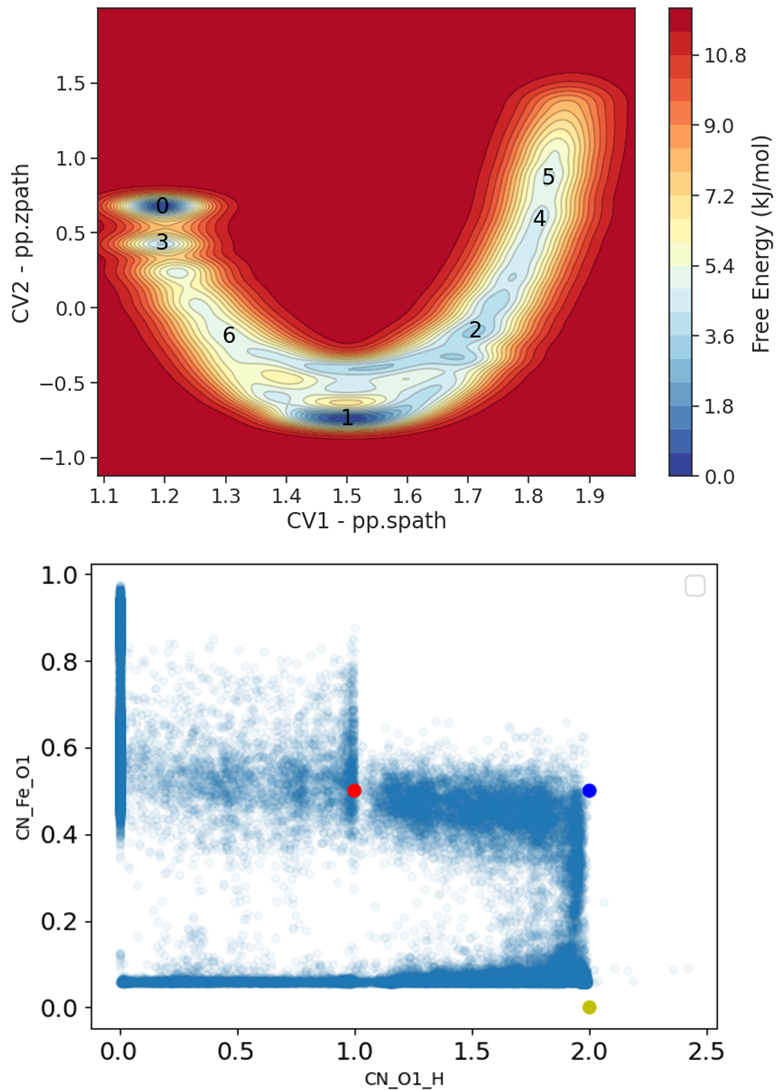


## plot subplot 2 CV and 1 CV in a big figure- free energy surface

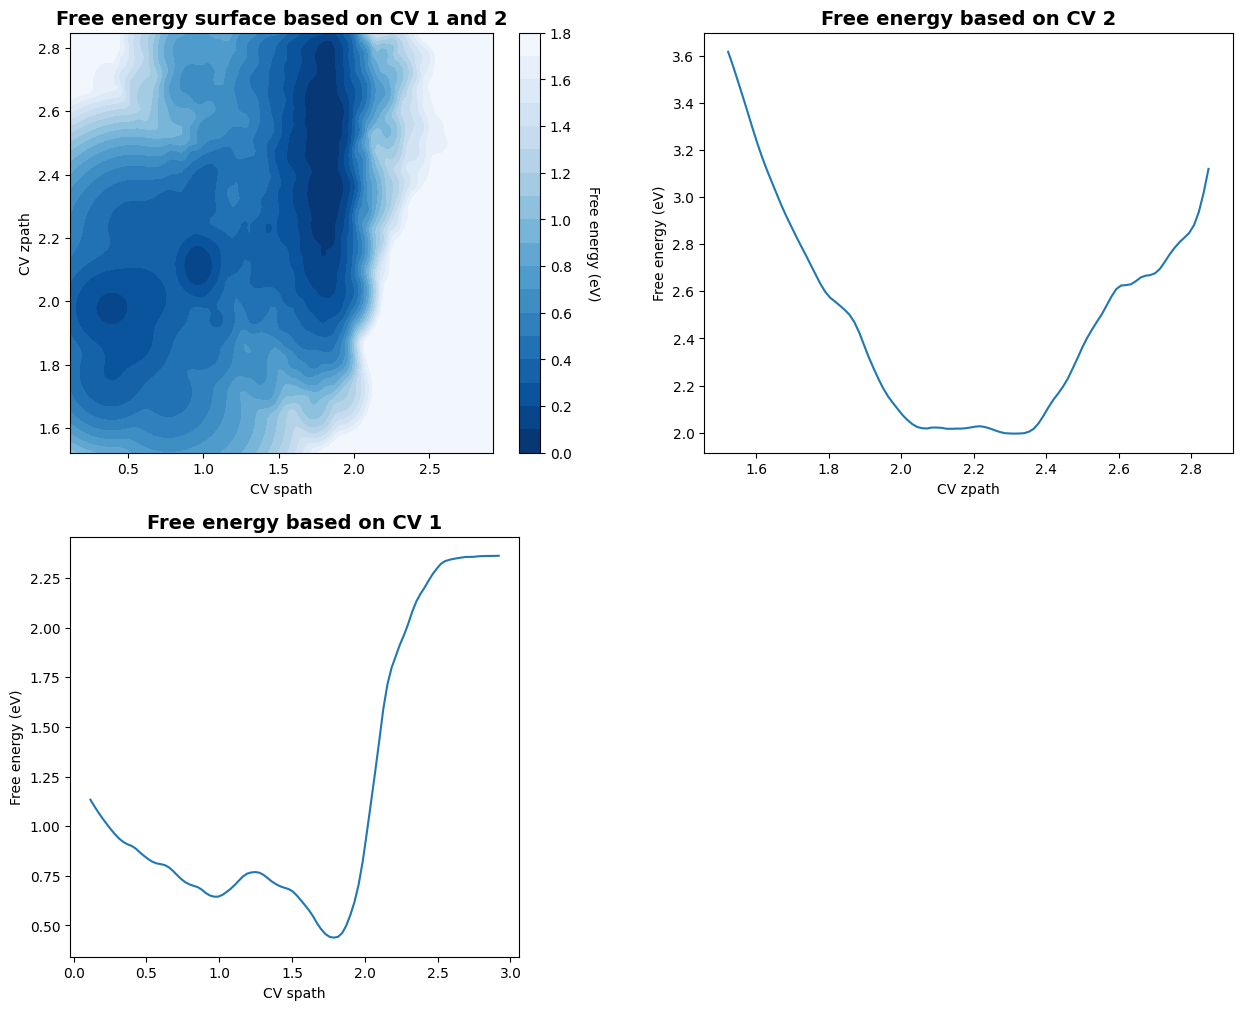

In [7]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
data = np.loadtxt('E:\\Project\\Fe-C-N4\\trajectory\\activate-learning\\iter07\\model-0-with_CV7_OPES-500ps(O1-H_d-Fe-O1_R-OH=1.2_NN=12_wall-FeO-2.8)\\fes_7.dat', comments='#')
x = data[:,0]
y = data[:,1]
z = data[:,2]
# transform data to 2D array
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.delaxes(axs[1,1])
# plot the 2D free energy surface
contour=axs[0,0].contourf(xi, yi, zi, 20, cmap='Blues_r')   # cmap may alse = plt.cm.jet
axs[0,0].set_xlabel('CV spath')
axs[0,0].set_ylabel('CV zpath')
cbar = plt.colorbar(contour)
cbar.set_label('Free energy (eV)', rotation=270, labelpad=20)
axs[0,0].set_title('Free energy surface based on CV 1 and 2',fontsize=14, fontweight='bold')

# plot 1D free energy surface with 1 CV using integration
z_integrated_y = np.trapz(zi, yi, axis=0)     # integrate along the y axis(axis=0)
axs[1,0].plot(xi, z_integrated_y)
axs[1,0].set_xlabel('CV spath')
axs[1,0].set_ylabel('Free energy (eV)')
axs[1,0].set_title('Free energy based on CV 1',fontsize=14, fontweight='bold')
pos = axs[1,0].get_position()
left, bottom, width, height = pos.x0, pos.y0, pos.width, pos.height
axs[1,0].set_position([left, bottom, width*0.85, height])

z_integrated_x = np.trapz(zi, xi, axis=1)     # integrate along the x axis(axis=1)
axs[0,1].plot(yi, z_integrated_x)
axs[0,1].set_xlabel('CV zpath')
axs[0,1].set_ylabel('Free energy (eV)')
axs[0,1].set_title('Free energy based on CV 2',fontsize=14, fontweight='bold')
plt.show()
# ain

In [ ]:

# plot 3D free energy surface with 2 CVs
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
# 读取数据
data = np.loadtxt('E:\\Project\\Fe-C-N4\\trajectory\\activate-learning\\iter07\\model-0-with_CV7_OPES-500ps(O1-H_d-Fe-O1_R-OH=1.2_NN=12_wall-FeO-2.8)\\fes_7.dat', comments='#')
# 提取数据
x = data[:,0]
y = data[:,1]
z = data[:,2]
# 将数据转换为网格形式
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
# 创建3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制三维曲面图
ax.plot_surface(xi, yi, zi, cmap='Blues_r')
ax.view_init(45,-45)        #设置视角，仰角，方位角
# 绘制二维投影
ax.contourf(xi, yi, zi, zdir='z', offset=ax.get_zlim()[0], cmap='Blues_r')
# 设置坐标轴标签
ax.set_xlim([+1.8,+3.0])
ax.set_ylim([1.6,4.3])
ax.set_xlabel('CV d_O-H-O (aingstrom)')
ax.set_ylabel('CV d_Fe-O (aingstrom)')
ax.set_zlabel('Free energy (eV)')
plt.show()

## plot by Dr Liu Yunpei's program miko-analyzer

In [1]:
import numpy as np
from miko.metad.hills import Hills
from miko.metad.fes import FreeEnergySurface
from miko.metad.profile import FreeEnergyProfile
from miko.metad.string import StringMethod
# for more information see 

Show nothing? Change here in file miko/metad/fes.py
Show nothing? Change here in file miko/metad/fes.py


2024-04-01 00:13:36,920 - INFO :     Minimum  free energy  CV1bin  CV2bin  CV1 - CN_O2_H  CV2 - CN_O1_O2
0         0     0.000000   193.0    37.0       1.965555        0.229106
1         1     0.758513    31.0    37.0       0.026545        0.229106
2         2     0.850727    32.0   212.0       0.038514        0.889876
3         3     1.156993    72.0   211.0       0.517282        0.886101
4         4     1.955359   193.0    91.0       1.965555        0.433001
5         5     2.147540   138.0    92.0       1.307249        0.436777
6         6     2.275513   122.0    94.0       1.115742        0.444329
7         7     2.354660   132.0   151.0       1.235434        0.659551
8         8     2.444861   190.0   144.0       1.929647        0.633120
9         9     2.467111    93.0   155.0       0.768635        0.674654
10       10     2.520925    60.0   156.0       0.373652        0.678430
11       11     2.849081    60.0    97.0       0.373652        0.455656


    Minimum  free energy  CV1bin  CV2bin  CV1 - CN_O2_H  CV2 - CN_O1_O2
0         0     0.000000   193.0    37.0       1.965555        0.229106
1         1     0.758513    31.0    37.0       0.026545        0.229106
2         2     0.850727    32.0   212.0       0.038514        0.889876
3         3     1.156993    72.0   211.0       0.517282        0.886101
4         4     1.955359   193.0    91.0       1.965555        0.433001
5         5     2.147540   138.0    92.0       1.307249        0.436777
6         6     2.275513   122.0    94.0       1.115742        0.444329
7         7     2.354660   132.0   151.0       1.235434        0.659551
8         8     2.444861   190.0   144.0       1.929647        0.633120
9         9     2.467111    93.0   155.0       0.768635        0.674654
10       10     2.520925    60.0   156.0       0.373652        0.678430
11       11     2.849081    60.0    97.0       0.373652        0.455656


2024-04-01 00:14:40,853 - INFO : Change in string: 0.0536129114
2024-04-01 00:15:44,267 - INFO : Change in string: 0.0569464462
2024-04-01 00:16:47,756 - INFO : Change in string: 0.0777480541
2024-04-01 00:17:51,384 - INFO : Change in string: 0.0603593420
2024-04-01 00:18:54,723 - INFO : Change in string: 0.0705944576
2024-04-01 00:19:57,905 - INFO : Change in string: 0.1055840879
2024-04-01 00:21:01,181 - INFO : Change in string: 0.0623980078
2024-04-01 00:22:04,299 - INFO : Change in string: 0.0300015131
2024-04-01 00:23:07,513 - INFO : Change in string: 0.0809435165
2024-04-01 00:24:10,802 - INFO : Change in string: 0.0661307759


Show nothing? Change here in file miko/metad/fes.py
Show nothing? Change here in file miko/metad/fes.py


(<Figure size 614.4x460.8 with 1 Axes>,
 <Axes: xlabel='Reaction coordinate', ylabel='Free Energy (kJ/mol)'>)

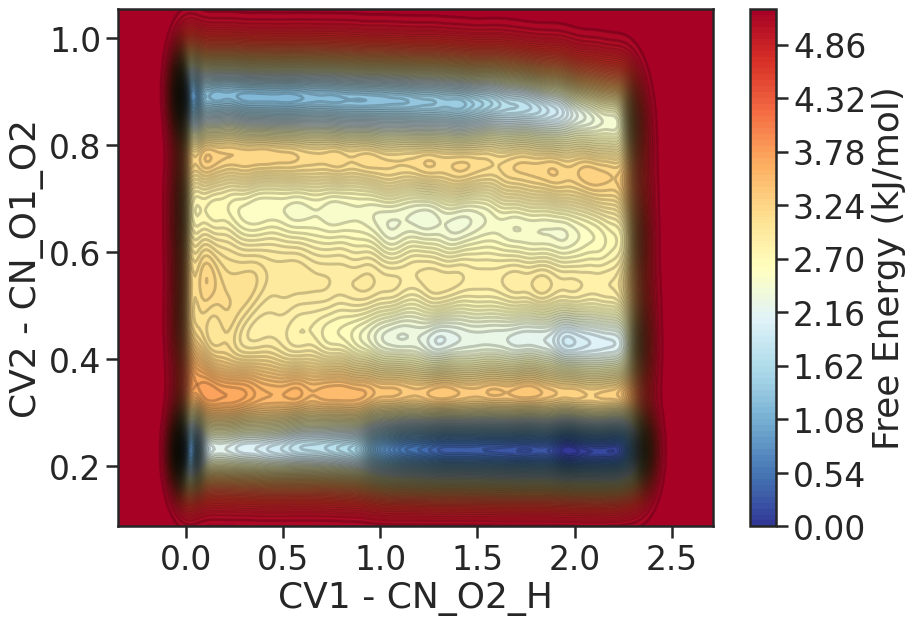

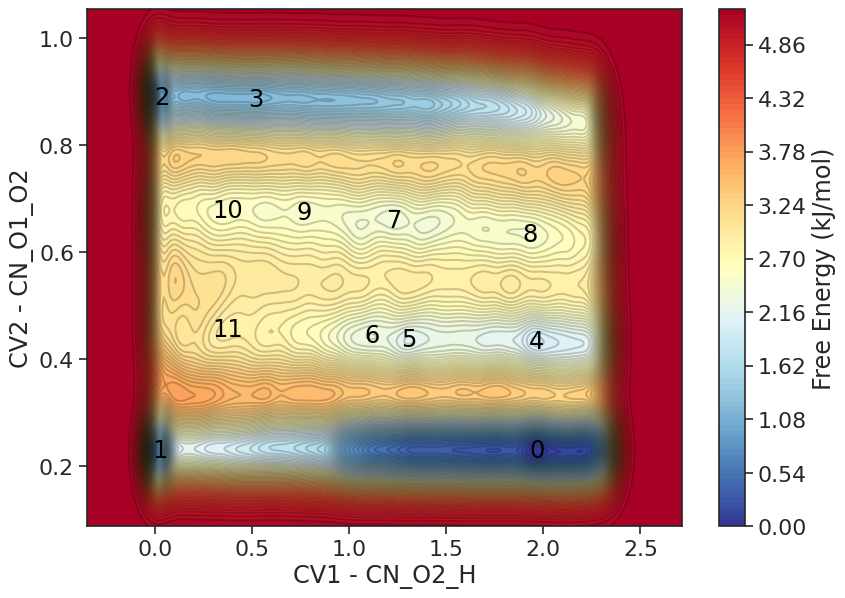

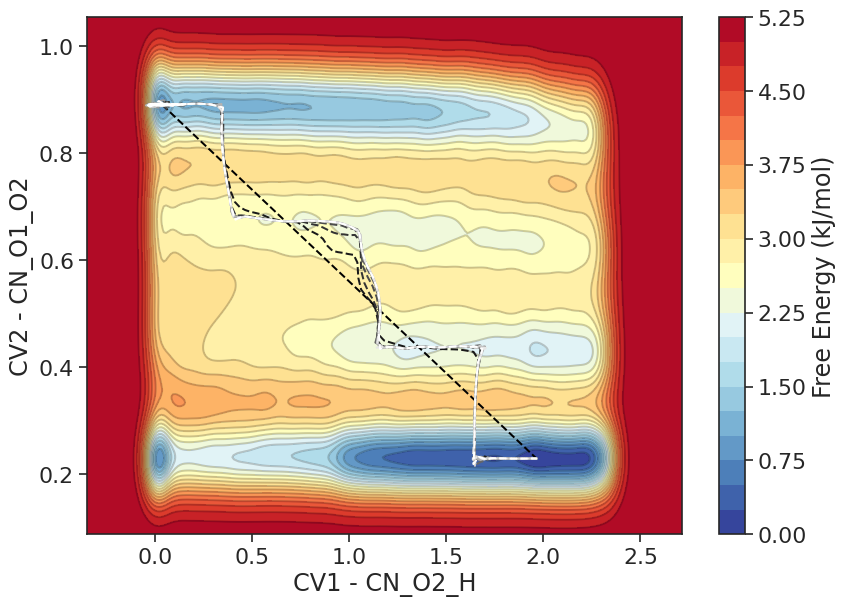

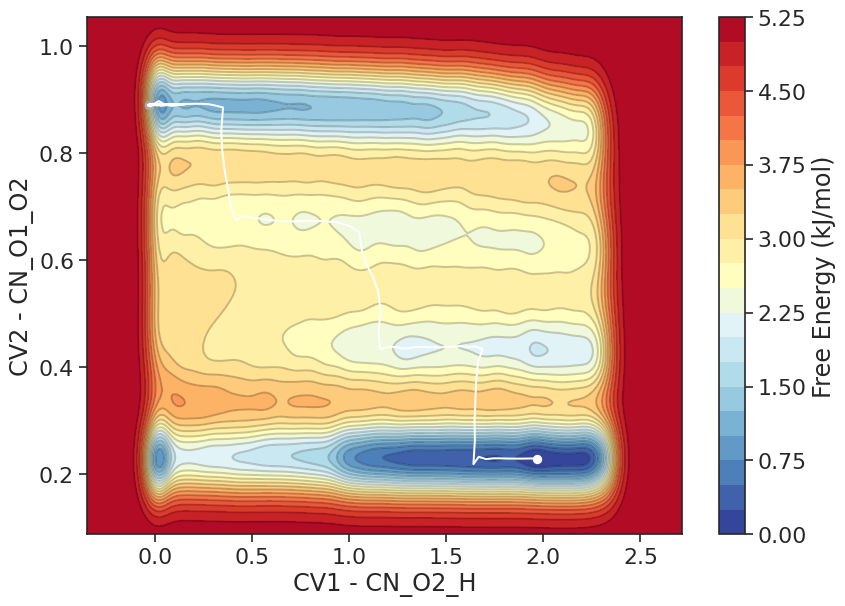

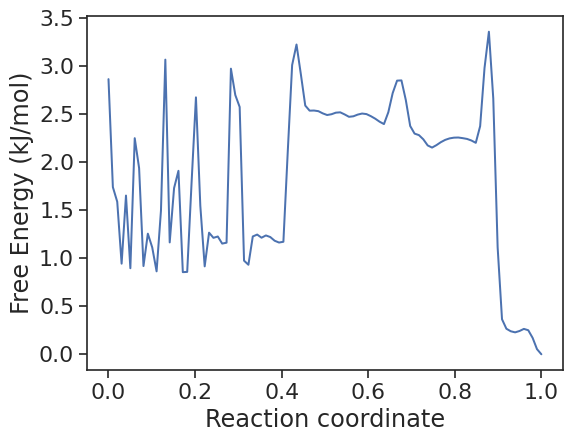

In [4]:
# load hills file as free energy surface
h1 = Hills(name="E:\\Project\\Fe-C-N4\\trajectory\\activate-learning\\iter11\\DPGen-2-model-0-with-CV10_MetaD-1000ps(height-0.05_O2_H-O1-O2_wall-O2H-2.2_wall-O1H-0.2_wall-d-FeO1_wall-O1-O2_wall-cell.z)--反应角度-前半段\\Hills",ignore_time=False, time_step=0.001)
fes = FreeEnergySurface.from_hills(h1, resolution=256)
# calculation fes (method like plumed sum_hills)
fes.make_fes_original(resolution=256, n_workers=4)
a = fes.plot(cmap="RdYlBu_r", levels=100, energy_unit="eV", style='ticks', context='talk')   # RdYlBu_r Blues_r

""" # plot the free energy surface with 1 CV
fes1 = fes.remove_cvs([0])
fes1.plot(cmap="RdYlBu", energy_unit="eV", image_size=[10,10], levels=20, dpi=96, style='ticks', context='talk')
fes2 = fes.remove_cvs([1])
fes2.plot(cmap="RdYlBu", levels=20, dpi=96, style='ticks', context='talk') """

# find and plot the minimas list
fes.find_minima()
fes.plot_minima(mark_color="black", levels=100, energy_unit="eV", png_name=None, style='ticks', context='notebook')   # plot local mini with number marked
df = fes.minima      # print the minimas list
print(df)

""" # plot the time-dependent profile of free energies of local minima from FreeEnergyProfile
fe_profile = FreeEnergyProfile(fes, h1)     # must use method find_minima() first
fe_profile.plot(energy_unit="eV", style='ticks', context='notebook') """

# find and plot minimum energy path(MEP)
s = StringMethod(fes)
s.load_minima()
s.mep_from_minima(begin_index=2, end_index=0)      #   , mid_indices=[2,0]  from local-mini 0 to local-mini 2, with local-mini 1 as the mid-point
# s.mep_from_minima(begin_index=4, end_index=2, mid_indices =[0], maxsteps=200000, integrator="rk4")        # fourth-order Runge-Kutta method, more stable but slower
s.plot_string_evolution(cmap="RdYlBu_r", levels=20, dpi=96)
s.plot_mep(cmap="RdYlBu_r", levels=20, dpi=96)
s.plot_mep_energy_profile(dpi=96)